**Originating prompt to give AI contex**t: We are exploring the "Credit Card Fraud Detection" dataset. basically, we want to go through some steps of providing context of the data, exploration, etc. Can we go back and forth, I can tell you what cell we are on and what it should do, and you provide code?

**Prompt**:  Okay. First we need a markdown cell introduction! It needs to title as "First Day of Data Science using python" listing"Dr. Amish Mishra" as the author in parentheses after it mention that it was recreated by Hannah Pefley and ChatGPT -4o. Also the fact that it is for my MAT 311 course, and saying todays date for when it was last updated. It should also have a short paragraph basically saying welcome to the learning experience, what we are exploring in the notebook, and what we want to get out of it!

# First Day of Data Science using Python

**Author:** Dr. Amish Mishra (Recreated by Hannah Pefley and ChatGPT -4o)  
**Course:** MAT 311  
**Last Updated:** December 4, 2024  

---

Welcome to this exciting learning experience! In this notebook, we will explore the "Credit Card Fraud Detection" dataset. Through this journey, we aim to develop foundational skills in data science using Python, including data exploration, analysis, and visualization techniques. By the end, we hope to gain insights into detecting fraudulent credit card transactions and the methods used to analyze imbalanced datasets. Let’s dive in!

**Prompt:** Excellent! next is another markdown cell. This cell should title something to do with giving context to our data! We should have a couple sentences saying where we downloaded the info from, and information on the website (https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data) it originates from regarding where it's from. It should also include a table with headers "feature" and "explaination" giving the names of all the columns and the explainations. can you do this please from the website I gave

# Dataset Context

The data used in this notebook originates from Kaggle's dataset repository, specifically from the [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data). This dataset contains information on credit card transactions, with an emphasis on detecting fraudulent behavior. It includes various features representing transaction details and user behavior.

---

## Features and Their Explanations

| **Feature**                          | **Explanation**                                                                 |
|--------------------------------------|---------------------------------------------------------------------------------|
| `distance_from_home`                 | The distance between the user's home and the transaction location.              |
| `distance_from_last_transaction`     | The distance between the current transaction and the last recorded transaction. |
| `ratio_to_median_purchase_price`     | Ratio of the transaction amount to the user's median purchase price.            |
| `repeat_retailer`                    | Indicates if the transaction occurred at a retailer the user has visited before.|
| `used_chip`                          | Indicates if the transaction used a chip-enabled card.                          |
| `used_pin_number`                    | Indicates if a PIN number was entered for the transaction.                      |
| `online_order`                       | Indicates if the transaction was made online.                                   |
| `fraud`                              | Target variable: 1 for fraud, 0 for legitimate transaction.                     |


**Prompt:** Okayyyy now is time for two cells! one should be a section header that just says we are loading the necessary libraries. The other should be an actual cell! WOOHOO! We want to import the necessary libraries. We'll need pandas, seaborn, matplotlib.pyplot, plotly.express, sklearn.model_selection, sklearn.preprocessing, sklearn.neighbors, and skearn.metrics (including classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, and f1_score). please be sure to separate these with comments for the import that is working with the data, the ones for visualization, and the ones for machine learning models.

# Loading the Necessary Libraries

In [744]:
# Importing libraries for working with data
import pandas as pd

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


**Prompt:** Next is a markdown cell explaining saying that we are loading in the data (no description really necessary). The file path should be "card_transdata.csv". Please read in the file to the path seperately and then into "transaction_data_raw". Then under that display the head of the data

# Loading the Data

In [745]:
# Reading in the dataset
file_path = "card_transdata.csv"
transaction_data_raw = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
transaction_data_raw.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


**Prompt:** Next are three code cells, one should simply get the shape of the data, the next should get the info, the next should get the data description.

In [746]:
# Checking the shape of the dataset
transaction_data_raw.shape

(999, 8)

In [747]:
# Getting information about the dataset
transaction_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [748]:
# Getting a statistical summary of the data
transaction_data_raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999.000000,996.000000,997.000000,992.000000,995.000000,997.000000,995.000000,999.000000
mean,26.876607,5.437319,1.655069,0.892137,0.313568,0.117352,0.673367,0.079079
std,63.899697,35.668094,2.351386,0.310364,0.464176,0.322001,0.469218,0.269997
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.990543,0.306441,0.468123,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.340321,0.958539,0.955504,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.393952,3.137259,1.922025,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


**Prompt:** Next is a markdown cell indicating we are now data wrangling. We are gonna tackle a lot in one go. We want a code cell that will give the sum of the null values for each column. Then a markdown cell. explaining that we need to figure out what to do with nulls, and explaining the option of dropping nulls/the lack of consequences of such since it's a small number. Then a code cell that does the dropping of the cells, by dropping and copying to a new variable "transaction_data_cleaned" and printing the shape of this new dataset. Then a new cell displaying it's head

# Data Wrangling

In [749]:
# Checking for null values in each column
transaction_data_raw.isnull().sum()

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

We need to decide how to handle the null values in the dataset. One option is to drop rows containing null values. Given that the number of nulls is small relative to the total dataset, dropping these rows won't significantly affect our analysis or model performance. Thus, we will drop the rows with null values in the next step.

In [750]:
# Dropping rows with null values and saving the cleaned dataset to a new variable
transaction_data_cleaned = transaction_data_raw.dropna().copy()

# Displaying the new shape after dropping nulls
transaction_data_cleaned.shape

(977, 8)

In [751]:
# Displaying the first few rows of the cleaned dataset
transaction_data_cleaned.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


**Prompt:** Okay. Next is markdown indicating we are visualizing our data. Then code for a seaborn countplot where we want to see the distribution of the fraud class. Then another cell doing the same thing just for the pin number distribution, another cell doing the same for repeat retailer, another for used_chip, and another for online orders

# Visualizing the Data

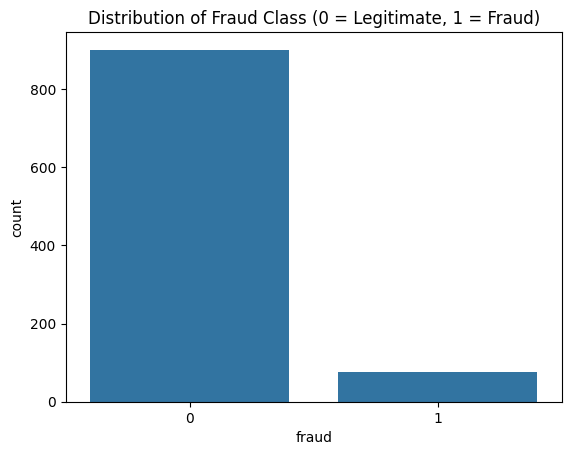

In [752]:
# Visualizing the distribution of the 'fraud' class using a countplot
sns.countplot(x='fraud', data=transaction_data_cleaned)
plt.title('Distribution of Fraud Class (0 = Legitimate, 1 = Fraud)')
plt.show()

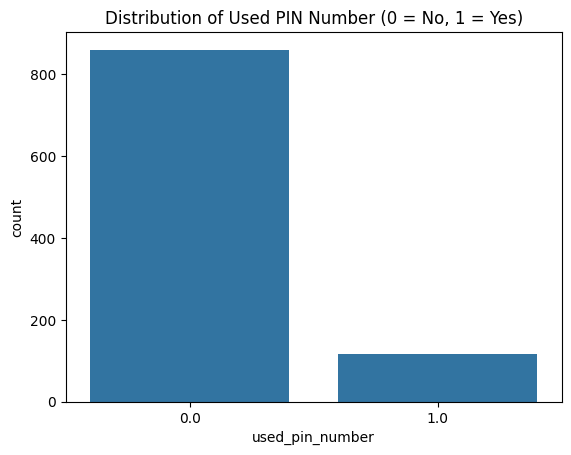

In [753]:
# Visualizing the distribution of the 'used_pin_number' feature
sns.countplot(x='used_pin_number', data=transaction_data_cleaned)
plt.title('Distribution of Used PIN Number (0 = No, 1 = Yes)')
plt.show()

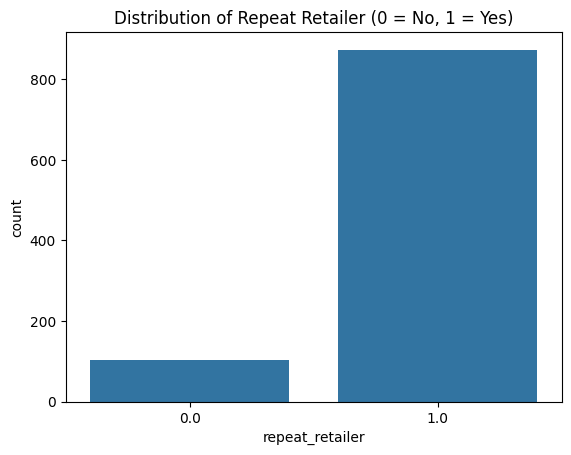

In [754]:
# Visualizing the distribution of the 'repeat_retailer' feature
sns.countplot(x='repeat_retailer', data=transaction_data_cleaned)
plt.title('Distribution of Repeat Retailer (0 = No, 1 = Yes)')
plt.show()

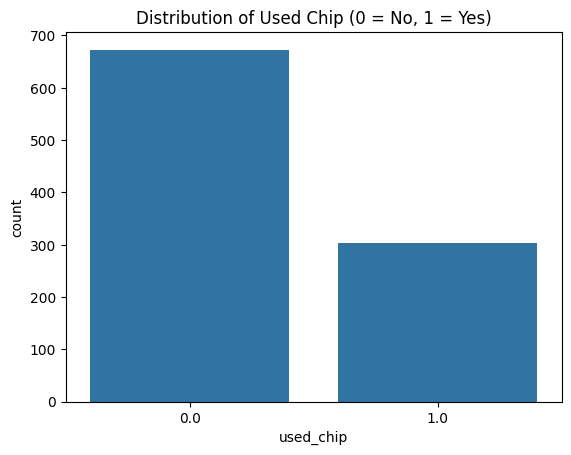

In [755]:
# Visualizing the distribution of the 'used_chip' feature
sns.countplot(x='used_chip', data=transaction_data_cleaned)
plt.title('Distribution of Used Chip (0 = No, 1 = Yes)')
plt.show()


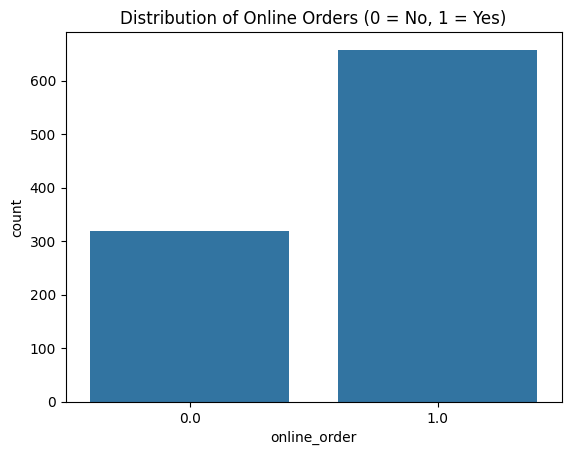

In [756]:
# Visualizing the distribution of the 'online_order' feature
sns.countplot(x='online_order', data=transaction_data_cleaned)
plt.title('Distribution of Online Orders (0 = No, 1 = Yes)')
plt.show()

**Prompt:** Epic. Okay, now we want to do a hist plot of the distance_from_last_transaction. We should use bins of 30. Similarly, we want to do another cell for ratio_to_median_purchase_price, and another for distance_from_home label the y's as "count" please

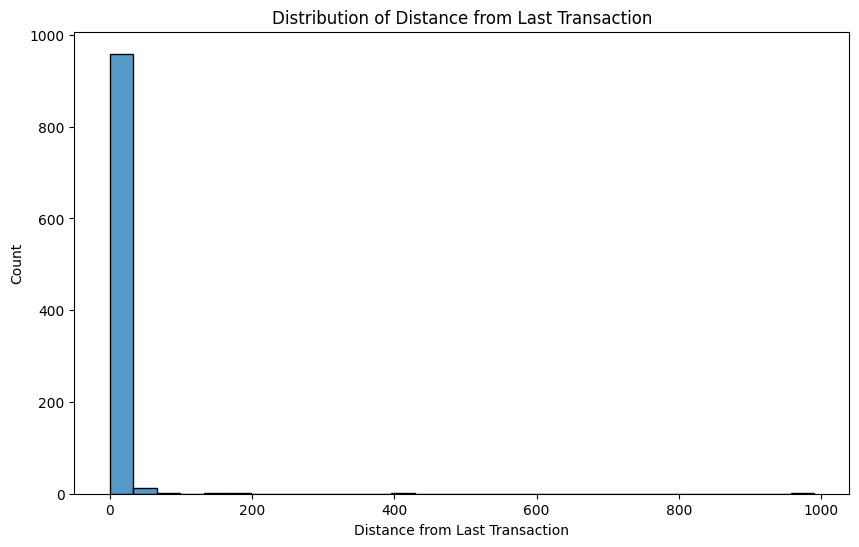

In [757]:
# Plotting a histogram for 'distance_from_last_transaction' with 30 bins
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data_cleaned['distance_from_last_transaction'], bins=30, kde=False)
plt.title('Distribution of Distance from Last Transaction')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Count')
plt.show()

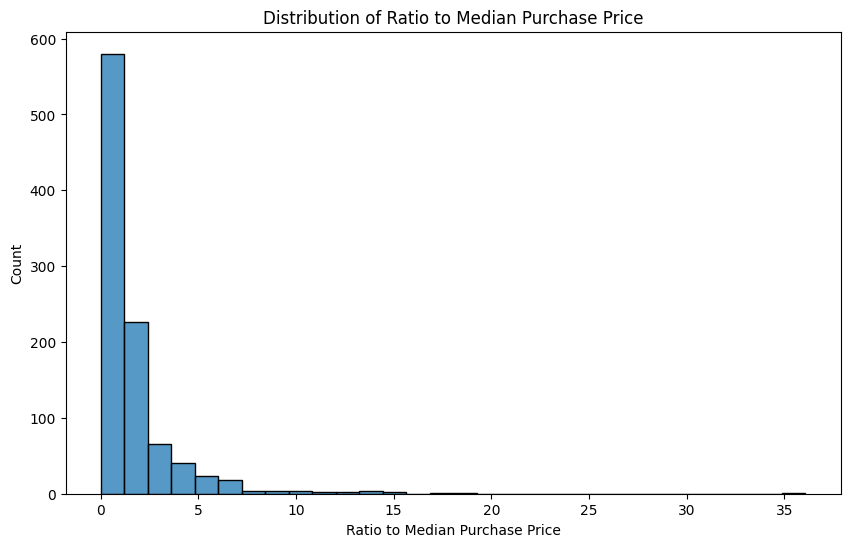

In [758]:
# Plotting a histogram for 'ratio_to_median_purchase_price' with 30 bins
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data_cleaned['ratio_to_median_purchase_price'], bins=30, kde=False)
plt.title('Distribution of Ratio to Median Purchase Price')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Count')
plt.show()

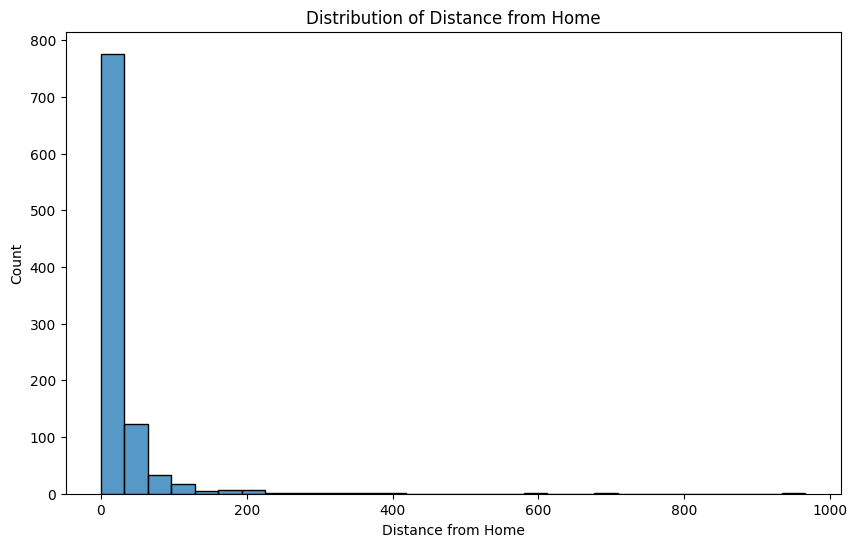

In [759]:
# Plotting a histogram for 'distance_from_home' with 30 bins
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data_cleaned['distance_from_home'], bins=30, kde=False)
plt.title('Distribution of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.show()

**Prompt:** Next section markdown is that we are doing better visualizations, with a one sentence description of what is more helpful for us to look at. 
We want code doing a countplot, looking at used pin number, but coloring by fraud, with a legend with green non-fradulent, and red as fraudulent

# Better Visualizations
In this section, we will create more insightful visualizations that highlight the relationship between different features and fraud detection, helping us understand the data in a more meaningful way.

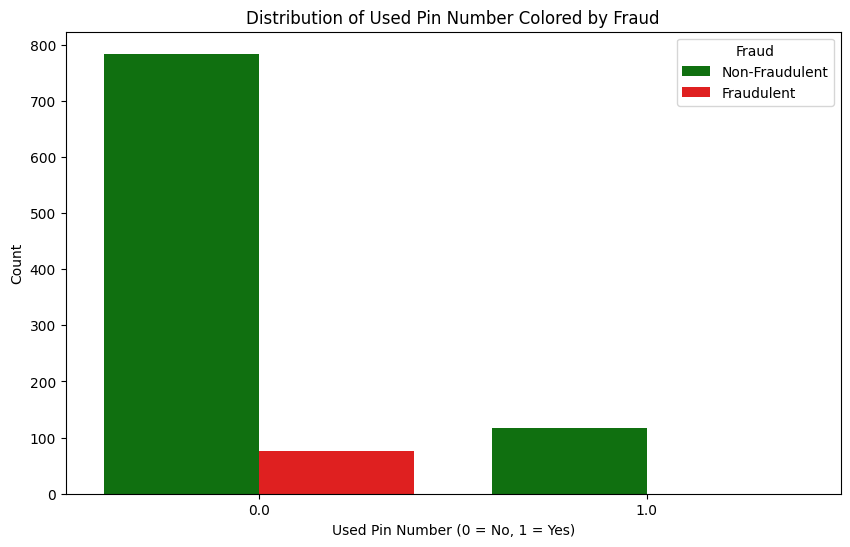

In [760]:
# Countplot for 'used_pin_number' colored by 'fraud' with a custom legend
plt.figure(figsize=(10, 6))
sns.countplot(x='used_pin_number', hue='fraud', data=transaction_data_cleaned, palette={0: 'green', 1: 'red'})

# Customizing the plot
plt.title('Distribution of Used Pin Number Colored by Fraud')
plt.xlabel('Used Pin Number (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'], loc='upper right')
plt.show()


**Prompt:** You're awesome. Time for another one, now a percentage plot for using pin number. The colors should be the same with the same general feel, just now a percent plot (use a stacked bar chart)

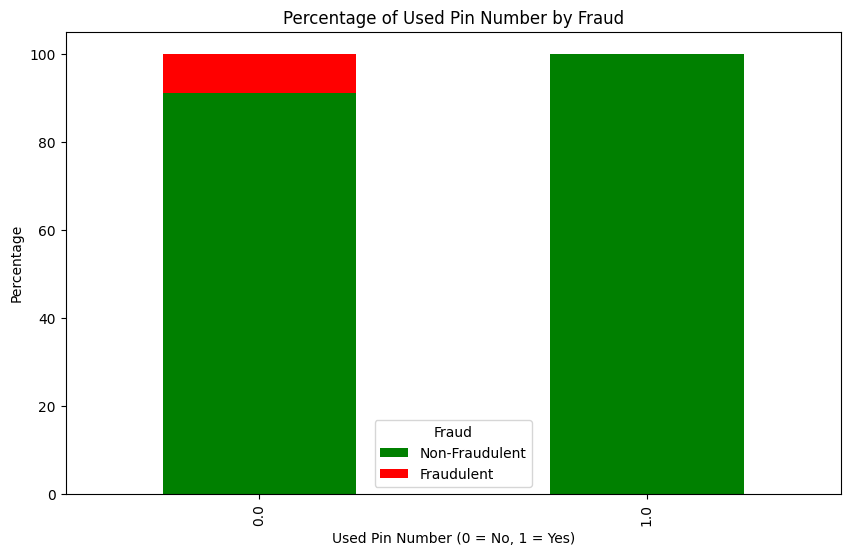

In [761]:
# Percentage plot for 'used_pin_number' by 'fraud' (stacked bar chart)
pin_fraud_percent = transaction_data_cleaned.groupby(['used_pin_number', 'fraud']).size().unstack().div(transaction_data_cleaned.groupby('used_pin_number').size(), axis=0) * 100

# Plotting
pin_fraud_percent.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Percentage of Used Pin Number by Fraud')
plt.xlabel('Used Pin Number (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Prompt:** You are awesome, that's almost exactly what I wanted! We are basically gonna now do the same as those last two plots, count plot and stacked bar chart. All in one cell now do the same as the last two, but now for repeat_retailer. headers should be similar to "transactions with repeat vs fraud" and "percent fraud with repeat" or something similar/professional

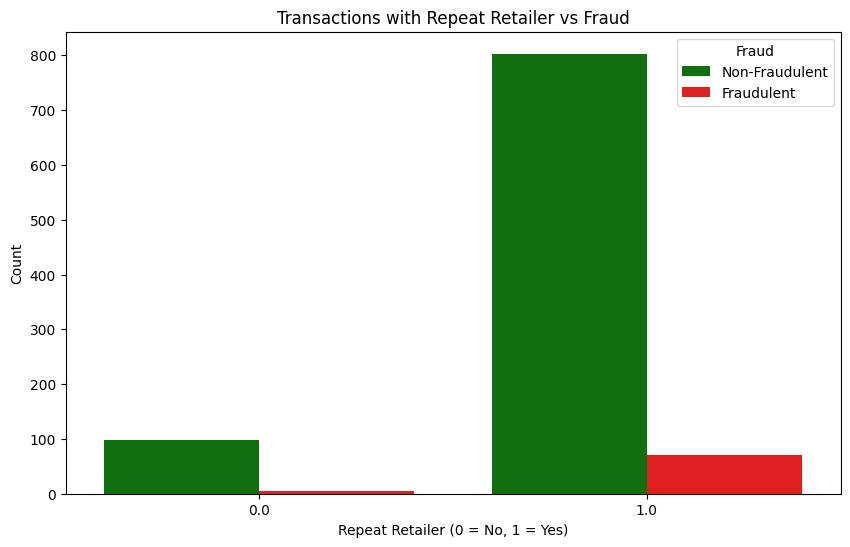

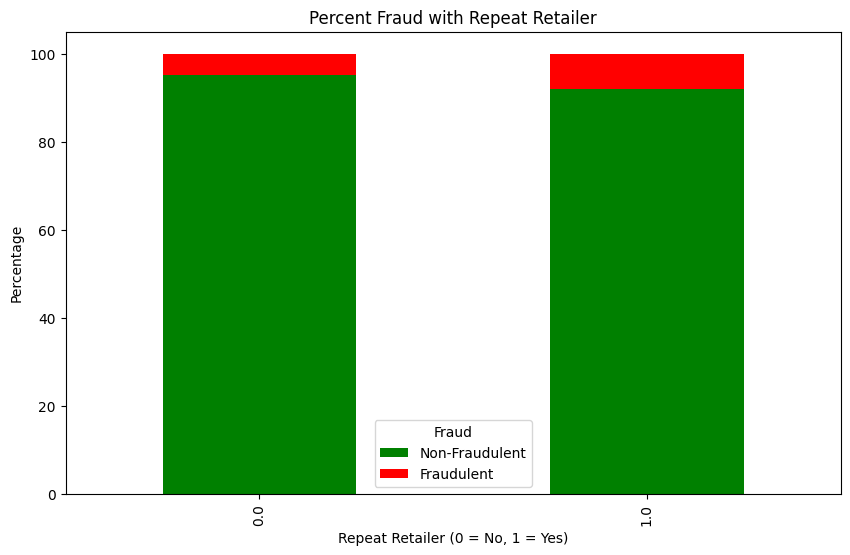

In [762]:
# Countplot for 'repeat_retailer' by 'fraud'
plt.figure(figsize=(10, 6))
sns.countplot(x='repeat_retailer', hue='fraud', data=transaction_data_cleaned, palette={0: 'green', 1: 'red'})
plt.title('Transactions with Repeat Retailer vs Fraud')
plt.xlabel('Repeat Retailer (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Percentage plot for 'repeat_retailer' by 'fraud' (stacked bar chart)
repeat_fraud_percent = transaction_data_cleaned.groupby(['repeat_retailer', 'fraud']).size().unstack().div(transaction_data_cleaned.groupby('repeat_retailer').size(), axis=0) * 100

# Plotting the stacked bar chart
repeat_fraud_percent.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Percent Fraud with Repeat Retailer')
plt.xlabel('Repeat Retailer (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

**Prompt:** Nice. Now the same thing for used_chip then another cell doing the same for online orders

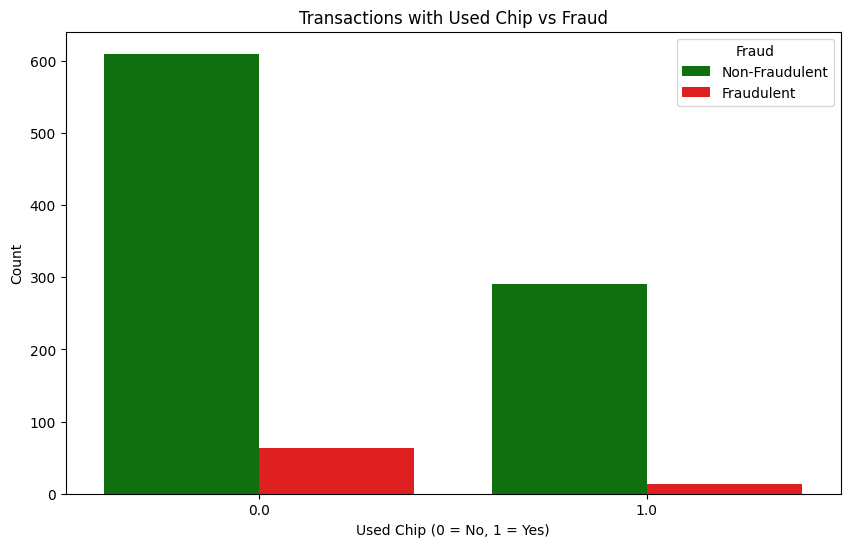

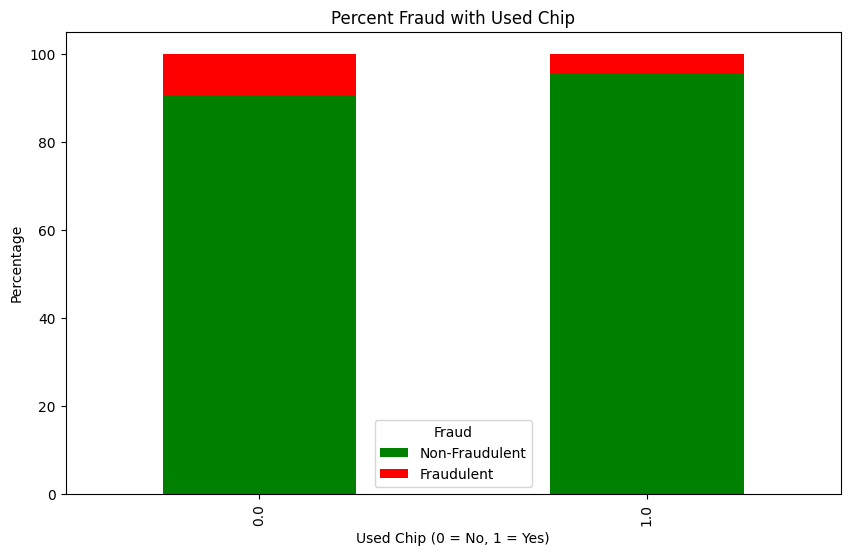

In [763]:
# Countplot for 'used_chip' by 'fraud'
plt.figure(figsize=(10, 6))
sns.countplot(x='used_chip', hue='fraud', data=transaction_data_cleaned, palette={0: 'green', 1: 'red'})
plt.title('Transactions with Used Chip vs Fraud')
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Percentage plot for 'used_chip' by 'fraud' (stacked bar chart)
chip_fraud_percent = transaction_data_cleaned.groupby(['used_chip', 'fraud']).size().unstack().div(transaction_data_cleaned.groupby('used_chip').size(), axis=0) * 100

# Plotting the stacked bar chart
chip_fraud_percent.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Percent Fraud with Used Chip')
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


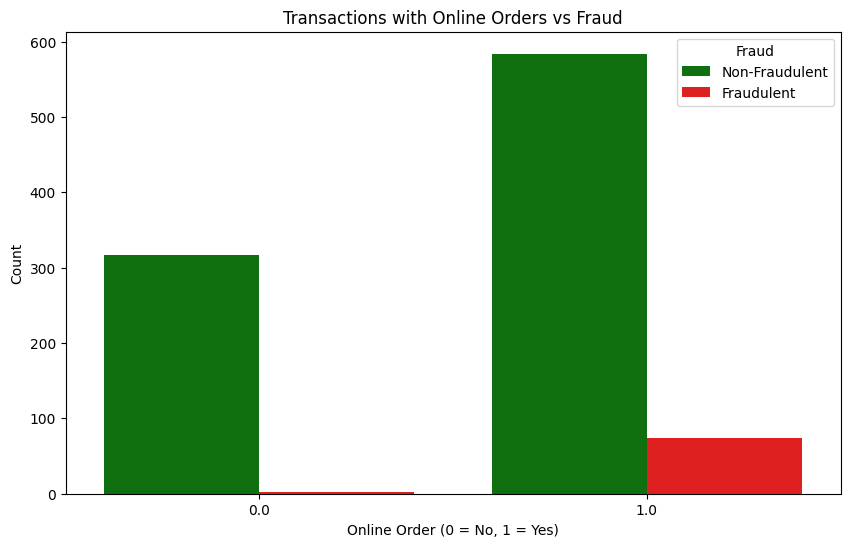

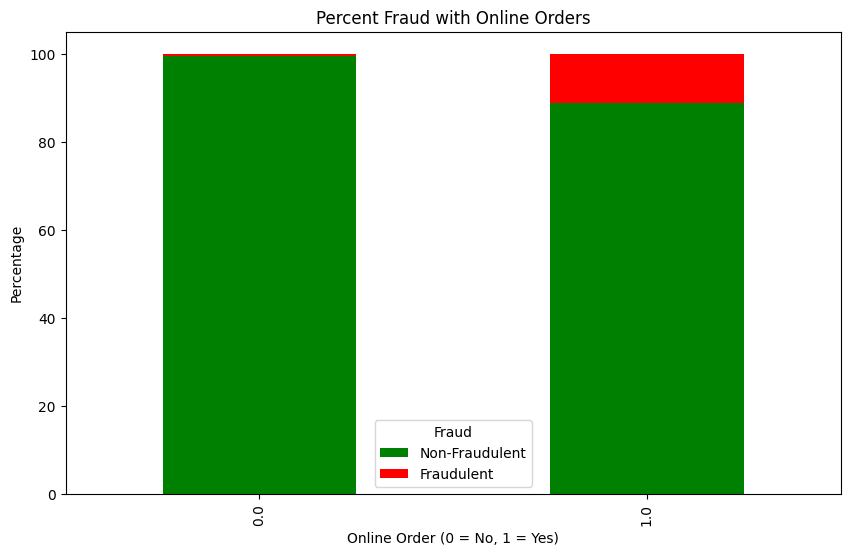

In [764]:
# Countplot for 'online_order' by 'fraud'
plt.figure(figsize=(10, 6))
sns.countplot(x='online_order', hue='fraud', data=transaction_data_cleaned, palette={0: 'green', 1: 'red'})
plt.title('Transactions with Online Orders vs Fraud')
plt.xlabel('Online Order (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Percentage plot for 'online_order' by 'fraud' (stacked bar chart)
online_fraud_percent = transaction_data_cleaned.groupby(['online_order', 'fraud']).size().unstack().div(transaction_data_cleaned.groupby('online_order').size(), axis=0) * 100

# Plotting the stacked bar chart
online_fraud_percent.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Percent Fraud with Online Orders')
plt.xlabel('Online Order (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Prompt:** Next header, we're doing bivariate visualizations. small description about colored scatterplots and what it helps us do. Give me threecells, each making scatter plots with dots colored by fraud and labed appropriately (0 or 1 l(green and red) labeled on the legend). First cell should do so for distance from home vs ratio to median purchase price. Second cell should do distance from home vs distance from last transaction, the next should do distance from last transaction vs ratio to median purchase price

# Bivariate Visualizations
In this section, we will explore bivariate relationships between pairs of features. We will create scatter plots colored by fraud status to help us visually identify any correlations or patterns between these features, which can be valuable for modeling and analysis.

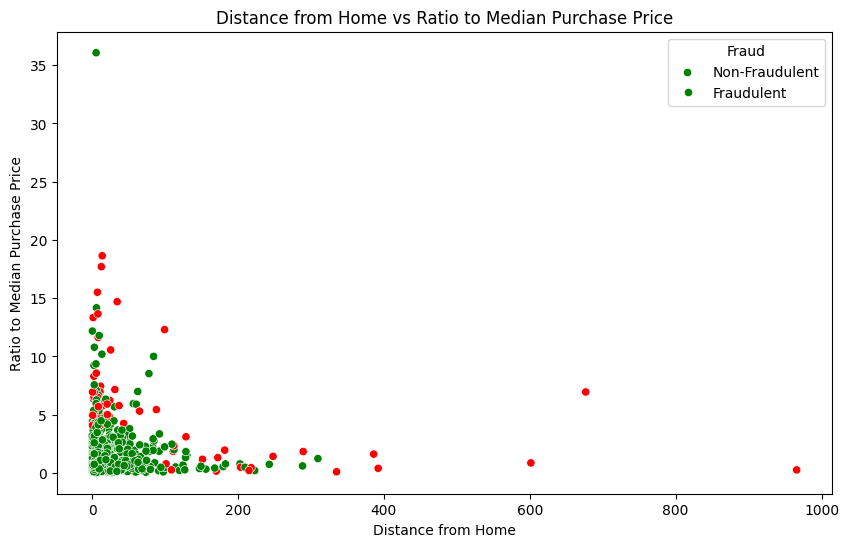

In [765]:
# Scatter plot for 'distance_from_home' vs 'ratio_to_median_purchase_price' colored by 'fraud'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_home', y='ratio_to_median_purchase_price', hue='fraud', data=transaction_data_cleaned, palette={0: 'green', 1: 'red'})

# Customizing the plot
plt.title('Distance from Home vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


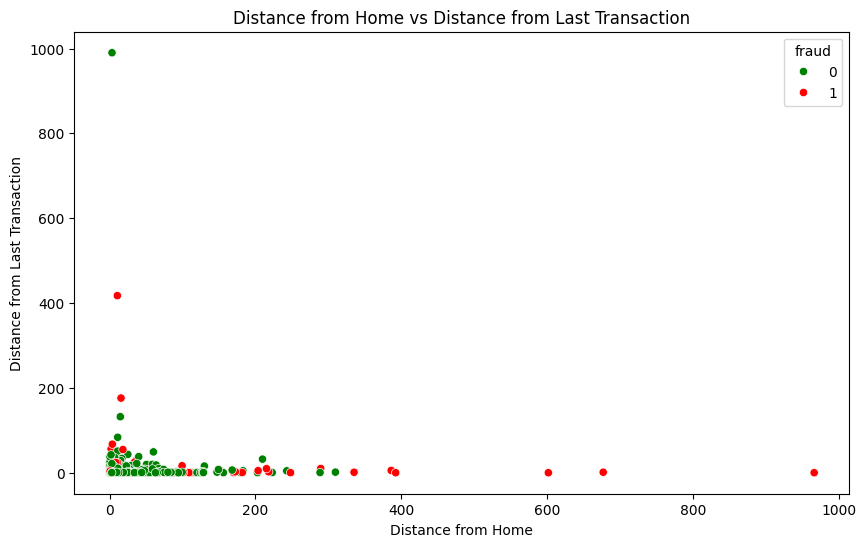

In [766]:
# Scatter plot for 'distance_from_home' vs 'distance_from_last_transaction' colored by 'fraud'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', hue='fraud', data=transaction_data_cleaned, palette={0: 'green', 1: 'red'})
plt.title('Distance from Home vs Distance from Last Transaction')
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.show()


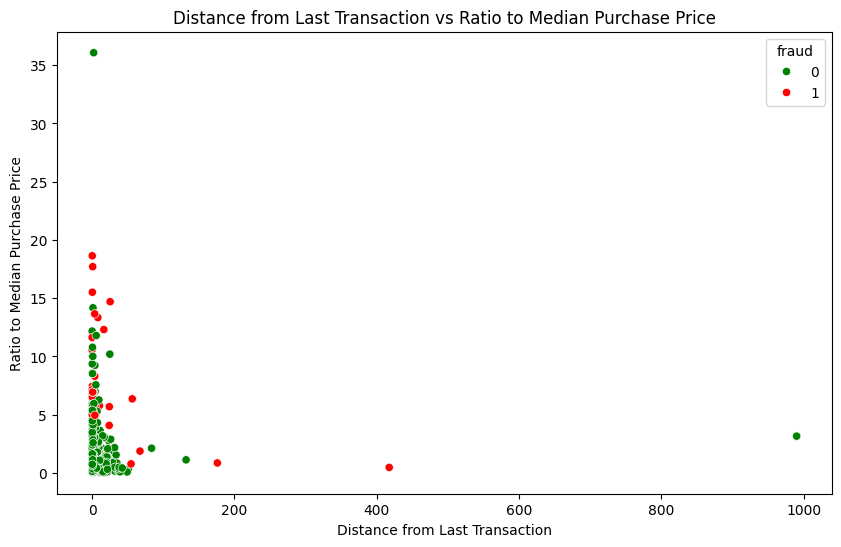

In [767]:
# Scatter plot for 'distance_from_last_transaction' vs 'ratio_to_median_purchase_price' colored by 'fraud'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_last_transaction', y='ratio_to_median_purchase_price', hue='fraud', data=transaction_data_cleaned, palette={0: 'green', 1: 'red'})
plt.title('Distance from Last Transaction vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()

**Prompt:** up next is a section asking if we can predict whether or not a transaction is fraud. We should make the section name something related to that, then have a description saying we are gonna predict on 20% of the data and learn from 80%. Give me that and code that will split our data into training and testing sets accordingly (remember we already have the correct packages imported, and we don't need to do anything extra like displaying shape) don't forget to set stratify = y.

# Predicting Fraudulent Transactions
In this section, we aim to predict whether a transaction is fraudulent based on the features in the dataset. To achieve this, we will split our data into a training set (80%) and a testing set (20%). The training set will be used to teach our model, and the testing set will evaluate its performance.

In [769]:
# Defining the features (X) and the target variable (y)
X = transaction_data_cleaned.drop(columns=['fraud'])
y = transaction_data_cleaned['fraud']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Prompt:** Great! now we want one cell that just has the word X_train (that will just print it itself), then the same for y_train, and then two, one for each of the test data, and then print how many transactions are in the test set

In [770]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
954,39.904167,0.367448,0.260833,1.0,1.0,0.0,1.0
143,2.660649,0.657162,3.837860,1.0,0.0,0.0,1.0
643,48.902727,0.205816,1.307000,1.0,0.0,1.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0
793,676.702348,1.209733,6.948586,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
685,5.916343,5.099247,0.419779,1.0,0.0,0.0,0.0
722,23.517527,3.513485,0.241444,1.0,0.0,0.0,0.0
173,3.273426,1.056948,1.694281,1.0,0.0,0.0,1.0
499,7.387696,1.598827,0.847218,1.0,0.0,0.0,1.0


In [771]:
y_train

954    0
143    0
643    0
15     0
793    1
      ..
685    0
722    0
173    0
499    0
593    0
Name: fraud, Length: 781, dtype: int64

In [772]:
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
782,0.701100,0.540487,1.754568,0.0,0.0,0.0,1.0
51,43.281314,3.367793,0.676058,1.0,1.0,1.0,1.0
197,4.586564,3.365070,2.454288,1.0,0.0,0.0,0.0
550,4.403263,0.173726,0.641169,1.0,0.0,0.0,0.0
412,965.910612,0.023604,0.257908,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
436,6.498016,0.228995,0.171750,1.0,0.0,0.0,0.0
868,9.258344,0.633609,0.066744,1.0,1.0,0.0,1.0
65,17.797888,1.395508,2.880479,1.0,1.0,0.0,0.0
743,5.599947,2.477098,5.956153,1.0,0.0,0.0,0.0


In [773]:
y_test


782    0
51     0
197    0
550    0
412    1
      ..
436    0
868    0
65     0
743    0
390    0
Name: fraud, Length: 196, dtype: int64

In [774]:
print(f"Number of transactions in the test set: {len(X_test)}")


Number of transactions in the test set: 196


**Prompt:** Next is a header for a model predicting always not fraud. it should have an appropriate heading and description. Then we want code that will do such and print the first 100 predictions (don't say it's the baseline model. it's just the never fraud model)

# Model Predicting All Transactions as Non-Fraud
To establish a baseline for comparison, we will evaluate the performance of a simple model that predicts all transactions as non-fraudulent. This approach helps us understand how a naive assumption performs relative to more advanced models.


In [775]:
# Predicting all transactions as non-fraudulent
non_fraud_predictions = [0] * len(y_test)

# Printing the first 100 predictions
print("First 100 predictions (0 = Non-Fraud):")
print(non_fraud_predictions[:100])

First 100 predictions (0 = Non-Fraud):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Prompt:** Great! next is a model that is basic modeling with Knn (just markdown header saying that before the code). So we just want to use three neighbors, . The next make our predictions, and print the first 100. Then a markdown header saying we are evaluating the model, and an explaination saying we should pay attention to the model's accuracy going over 90 percent. Then the code below that should construct a confucion matrix for the never fraud model (as a heatmap), and give a classification report. The code cell after that should do the heatmap confusion matrix and classification report for our knn model. The next cell after that should be markdown saying we are comparing model performance.


# Basic Modeling with k-Nearest Neighbors
In this section, we will train a simple k-Nearest Neighbors (k-NN) model using three neighbors. This will serve as our first predictive model.

In [776]:
# Train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Print the first 100 predictions
print("First 100 predictions (k-NN):")
print(knn_predictions[:100])

First 100 predictions (k-NN):
[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


# Evaluating the Model
In this section, we will evaluate the performance of our models. It is essential to observe the accuracy, and we expect it to exceed 90%. Confusion matrices and classification reports will help us understand performance across different metrics.


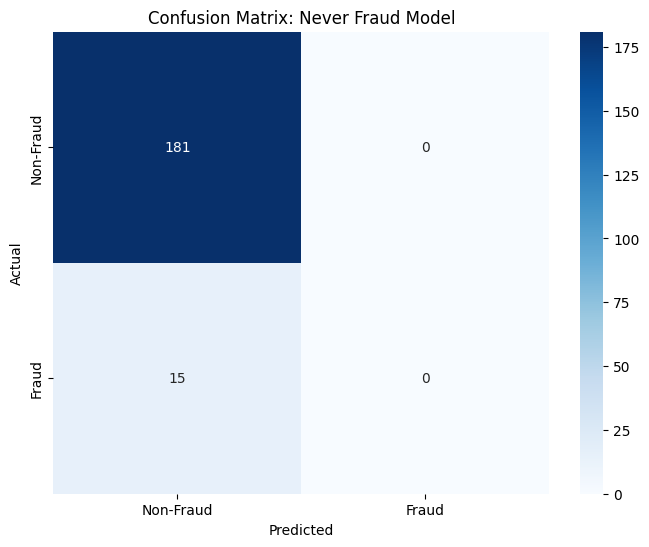

Classification Report: Never Fraud Model
              precision    recall  f1-score   support

   Non-Fraud       0.92      1.00      0.96       181
       Fraud       0.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.46      0.50      0.48       196
weighted avg       0.85      0.92      0.89       196



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [777]:
# Confusion matrix for the "Never Fraud" model
never_fraud_cm = confusion_matrix(y_test, non_fraud_predictions)

# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(never_fraud_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix: Never Fraud Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for the "Never Fraud" model
print("Classification Report: Never Fraud Model")
print(classification_report(y_test, non_fraud_predictions, target_names=['Non-Fraud', 'Fraud']))


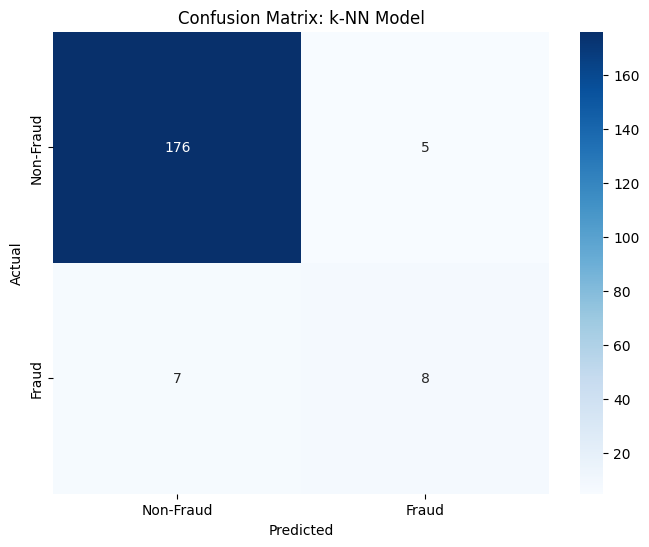

Classification Report: k-NN Model
              precision    recall  f1-score   support

   Non-Fraud       0.96      0.97      0.97       181
       Fraud       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



In [778]:
# Confusion matrix for the k-NN model
knn_cm = confusion_matrix(y_test, knn_predictions)

# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix: k-NN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for the k-NN model
print("Classification Report: k-NN Model")
print(classification_report(y_test, knn_predictions, target_names=['Non-Fraud', 'Fraud']))

# Comparing Model Performance
Finally, we will compare the performance metrics (accuracy, precision, recall, and F1 score) between the "Never Fraud" model and the k-NN model.


**Prompt:** the next code cell should compare the performance by computing the metrics accuracy, precision, recall,, and f1 for each model, and then putting them in adjacent three lists, one with the metric names, one with the scores for knn, and one for the scores for never fraud, and then it should put them in a data frame with column names metric, k-nn and never fraud. From there we need to plot them with a bar chart. the x should be the different metrics, and the y should be the score, then each should have the knn and never fraud as bars. make sure you use zero division = 0. Also don't print the comparison dataframe. Also make the barwidth 0.35

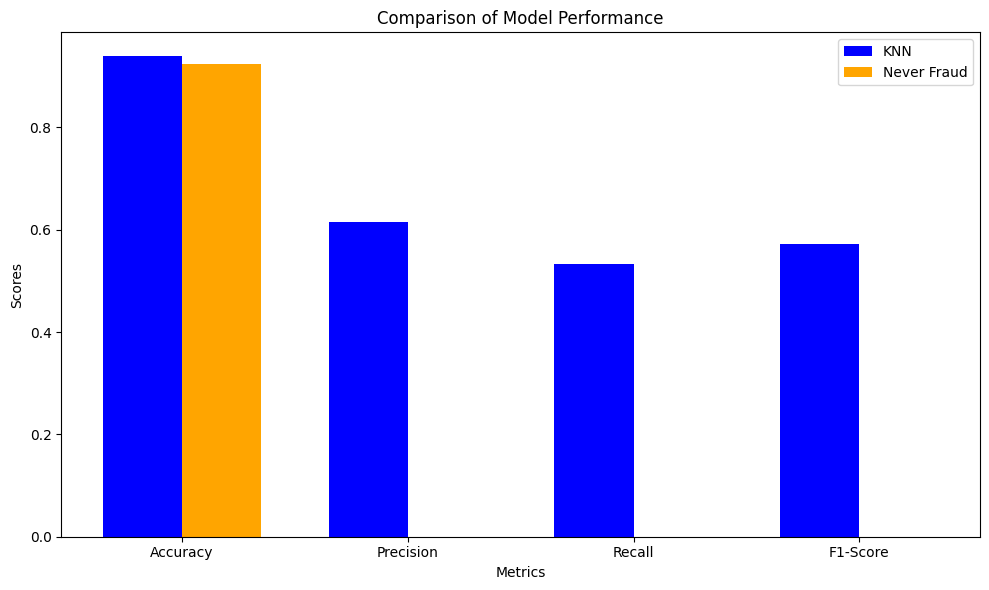

In [779]:
# Calculate the metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [
    accuracy_score(y_test, knn_predictions),
    precision_score(y_test, knn_predictions, zero_division=0),
    recall_score(y_test, knn_predictions, zero_division=0),
    f1_score(y_test, knn_predictions, zero_division=0)
]

never_fraud_scores = [
    accuracy_score(y_test, non_fraud_predictions),
    precision_score(y_test, non_fraud_predictions, zero_division=0),
    recall_score(y_test, non_fraud_predictions, zero_division=0),
    f1_score(y_test, non_fraud_predictions, zero_division=0)
]

# Create a DataFrame to display the comparison
performance_df = pd.DataFrame({
    'Metric': metrics,
    'KNN': knn_scores,
    'Never Fraud': never_fraud_scores
})

# Plot the comparison as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

# Plot bars for KNN and Never-Fraud
bar_knn = ax.bar(index, knn_scores, bar_width, label='KNN', color='blue')
bar_never_fraud = ax.bar([i + bar_width for i in index], never_fraud_scores, bar_width, label='Never Fraud', color='orange')

# Labeling and styling the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Prompt:** 
 We should have a markdown cell with a header saying that we want to make a 3d visualization of our a knn prediction and that it's a bonus question. and a description saying that we just want to plot 3 variables to see if we can determine fraud. Then we have to code. we want to make a dataframe with two new transactions. adding one with ratio to median purchase price 5, the other with 2.5. The first new one should have distance from last transaction 0 and the other of 15, the distance from home for the first should be 600, and for the second 30. and there should be a fraud name column where the first is called 'New Transaction 1' and the second New Transaction 2. We then want to map the existing fraud values to descriptive labels (in the original cleaned dataset) so that it says non-Fraudulent and Frauduent. Then we want to add the new transactions to the original dataframe and then make a 3d scatter plot. make the markers of non fraud and fraud size 3 and new transaction 1 and 2 size 6. make the plot window with width 1000 and height 800. please make x='ratio_to_median_purchase_price', y='distance_from_last_transaction' and z='distance_from_home'

# Bonus: 3D Visualization of KNN Predictions
As a bonus, we will create a 3D scatter plot to visualize the KNN predictions. This plot will include three variables (`distance_from_home`, `distance_from_last_transaction`, and `ratio_to_median_purchase_price`) and indicate whether each transaction is fraudulent or non-fraudulent. Additionally, we will add two new transactions with distinct characteristics to observe how they might be classified by the KNN model.


In [780]:
# Create two new transactions
new_transactions = pd.DataFrame({
    'distance_from_home': [600, 30],
    'distance_from_last_transaction': [0, 15],
    'ratio_to_median_purchase_price': [5, 2.5],
    'fraud': ['New Transaction 1', 'New Transaction 2']
})

# Map existing fraud values to descriptive labels
transaction_data_cleaned['fraud'] = transaction_data_cleaned['fraud'].map({0: 'Non-Fraudulent', 1: 'Fraudulent'})

# Add the new transactions to the cleaned dataset
combined_data = pd.concat([transaction_data_cleaned, new_transactions], ignore_index=True)

# Create a 3D scatter plot
fig = px.scatter_3d(
    combined_data,
    x='ratio_to_median_purchase_price',
    y='distance_from_last_transaction',
    z='distance_from_home',
    color='fraud',
    size=combined_data['fraud'].map(
        {'Non-Fraudulent': 3, 'Fraudulent': 3, 'New Transaction 1': 6, 'New Transaction 2': 6}
    ),
    title='3D Visualization of Transactions with KNN Predictions',
    labels={'distance_from_home': 'Distance from Home', 
            'distance_from_last_transaction': 'Distance from Last Transaction', 
            'ratio_to_median_purchase_price': 'Ratio to Median Purchase Price'},
    width=1000,
    height=800
)

# Show the plot
fig.show()
